In [1]:
!pip install scikeras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
seed = 42
np.random.seed(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/code/stefanbergstein/keras-deep-learning-on-titanic-data/notebook

In [2]:
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'
dataframe = pd.read_csv(url)

In [3]:
dataframe.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [4]:
import random
female_mean = dataframe.loc[dataframe['Sex'] == 'female', 'Age'].mean()+random.randint(5, 10)
other_mean = dataframe.loc[dataframe['Sex'] != 'female', 'Age'].mean()+random.randint(5, 10)
dataframe['Age'] = np.where((dataframe['Sex'] == 'female') & (dataframe['Age'].isnull()), female_mean, dataframe['Age'])
dataframe['Age'] = np.where((dataframe['Sex'] != 'female') & (dataframe['Age'].isnull()), other_mean, dataframe['Age'])
dataframe = dataframe.drop('Sex', axis = 1)
dataframe = dataframe.drop('Name', axis = 1)
scale_pclass = {'1st': 1, '2nd': 2, '3rd': 3, '*': 4}
dataframe['PClass'].replace(scale_pclass, inplace = True)
dataframe.head()

,PClass,Age,Survived,SexCode
0,1,29.00,1,1
1,1,2.00,0,1
2,1,30.00,0,0
3,1,25.00,0,1
4,1,0.92,1,0


In [5]:
y = dataframe['Survived'].values
x = dataframe.drop('Survived', axis = 1).values.astype(float)
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x, y, test_size = 0.2, random_state = 5)
sc = StandardScaler()
x_ftrain = sc.fit_transform(x_ftrain)
x_ftest = sc.fit_transform(x_ftest)

In [6]:
def create_model(optimizer = 'adam', init = 'uniform'):
  model = Sequential()
  model.add(Dense(16, input_dim = x.shape[1], kernel_initializer = init, activation = 'relu'))
  model.add(Dense(8, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(4, kernel_initializer = init, activation = 'relu'))
  model.add(Dense(1, kernel_initializer = init, activation = 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  display(model.summary())
  return model

In [7]:
best_epochs = 200
best_batch_size = 5
best_init = 'glorot_uniform'
best_optimizer = 'rmsprop'
model_pred = KerasClassifier(model = create_model, optimizer = best_optimizer, init = best_init, epochs = best_epochs, batch_size = best_batch_size, verbose = 0)
model_pred.fit(x_ftrain, y_ftrain)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


None

KerasClassifier(
	model=<function create_model at 0x7fedf0049440>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	init=glorot_uniform
	class_weight=None
)

In [8]:
pred1 = model_pred.predict(x_ftest)

In [9]:
print("Точность:", accuracy_score(y_ftest, pred1))

Точность: 0.7984790874524715


In [10]:
y_actu = pd.Series(y_ftest, name='Actual')
df_confusion = pd.crosstab(y_actu, pred1)
df_confusion

col_0,0,1
Actual,,
0,160,11
1,42,50


https://www.kaggle.com/code/rushabhwadkar/deep-learning-with-keras-on-iris-dataset/notebook

In [11]:
iris = datasets.load_iris()
X = iris.data
target = iris.target
names = iris.target_names
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

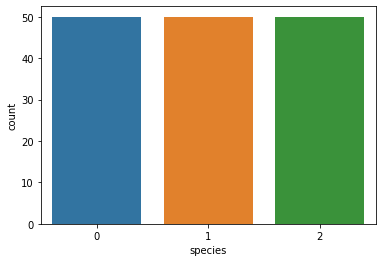

In [13]:
sns.countplot(x = 'species', data = df)

In [14]:
y = df['species'].values
x = df.drop('species', axis = 1).values.astype(float)
y_binary = to_categorical(y)
display(y_binary.shape)
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_ftrain, x_ftest, y_ftrain, y_ftest = train_test_split(x_scaled, y_binary, test_size = 0.2, random_state = seed, stratify = y, shuffle = True)
display(x_ftrain.shape)
display(x_ftest.shape)
display(y_ftrain.shape)
display(y_ftest.shape)

(150, 3)

(120, 4)

(30, 4)

(120, 3)

(30, 3)

In [15]:
def create_model(optimizer = 'adam', init = 'he_normal'):
  model = Sequential()
  model.add(Dense(10, input_dim = x.shape[1], activation = 'relu', kernel_initializer = init, kernel_regularizer = keras.regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(7, activation = 'relu', kernel_initializer = init, kernel_regularizer = keras.regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(5, activation = 'relu', kernel_initializer = init, kernel_regularizer = keras.regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  display(model.summary())
  return model

In [16]:
model_pred = create_model()
model_pred.fit(x_ftrain, y_ftrain, epochs = 700, batch_size = 7, verbose = 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 77        
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 7)                

None

In [17]:
model_pred.evaluate(x_ftest, y_ftest)

1/1 [==============================] - 0s 275ms/step - loss: 0.0751 - accuracy: 1.0000


[0.07511420547962189, 1.0]

https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook

In [18]:
(x_ftrain, y_ftrain), (x_ftest, y_ftest) = mnist.load_data()

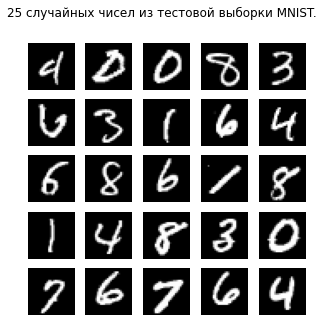

In [19]:
indexes = np.random.randint(0, x_ftrain.shape[0], size = 25)
images = x_ftrain[indexes]
labels = y_ftrain[indexes]
fig_mnist = plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
fig_mnist.suptitle("25 случайных чисел из тестовой выборки MNIST.")
plt.show()

In [20]:
x_ftrain = np.reshape(x_ftrain, [-1, 784]).astype("float32")/255
x_ftest = np.reshape(x_ftest, [-1, 784]).astype("float32")/255
y_ftrain_binary = to_categorical(y_ftrain)
y_ftest_binary = to_categorical(y_ftest)
display(x_ftrain.shape)
display(x_ftest.shape)
display(y_ftrain_binary.shape)
display(y_ftest_binary.shape)

(60000, 784)

(10000, 784)

(60000, 10)

(10000, 10)

In [21]:
target_batch_size = 128
target_hidden_units = 256
def create_model():
  model = Sequential()
  model.add(Dense(target_hidden_units, input_dim = 784)) #Ввод всех 784 чёрно-белых (0-255) пикселей с изображения.
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(target_hidden_units))
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(10)) #10 возможных цифр.
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  display(model.summary())
  return model

In [22]:
model_pred = create_model()
model_pred.fit(x_ftrain, y_ftrain_binary, epochs = 20, batch_size = target_batch_size, verbose = 0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)               

None

In [23]:
model_pred.evaluate(x_ftest, y_ftest_binary, batch_size = 128)

79/79 [==============================] - 1s 5ms/step - loss: 0.0693 - accuracy: 0.9817


[0.06934165954589844, 0.9817000031471252]

In [24]:
(x_ftrain, y_ftrain), (x_ftest, y_ftest) = fashion_mnist.load_data()

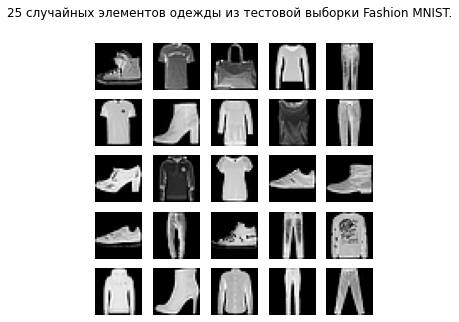

In [25]:
indexes = np.random.randint(0, x_ftrain.shape[0], size = 25)
images = x_ftrain[indexes]
labels = y_ftrain[indexes]
fig_mnist = plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
fig_mnist.suptitle("25 случайных элементов одежды из тестовой выборки Fashion MNIST.")
plt.show()

In [26]:
x_ftrain = np.reshape(x_ftrain, [-1, 784]).astype("float32")/255
x_ftest = np.reshape(x_ftest, [-1, 784]).astype("float32")/255
y_ftrain_binary = to_categorical(y_ftrain)
y_ftest_binary = to_categorical(y_ftest)
display(x_ftrain.shape)
display(x_ftest.shape)
display(y_ftrain_binary.shape)
display(y_ftest_binary.shape)

(60000, 784)

(10000, 784)

(60000, 10)

(10000, 10)

In [27]:
target_batch_size = 128
target_hidden_units = 256
def create_model():
  model = Sequential()
  model.add(Dense(target_hidden_units, input_dim = 784)) #Ввод всех 784 чёрно-белых (0-255) пикселей с изображения.
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(target_hidden_units))
  model.add(Activation('relu'))
  model.add(Dropout(0.45))
  model.add(Dense(10)) #10 возможных элементов одежды.
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  display(model.summary())
  return model

In [28]:
model_pred = create_model()
model_pred.fit(x_ftrain, y_ftrain_binary, epochs = 20, batch_size = target_batch_size, verbose = 0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

None

In [29]:
model_pred.evaluate(x_ftest, y_ftest_binary, batch_size = 128)

79/79 [==============================] - 1s 5ms/step - loss: 0.3262 - accuracy: 0.8821


[0.3262377977371216, 0.882099986076355]